### Testing

This notebook contains tests to make sure my implementation of WOSA and Scipy's Welch give the same output 


In [3]:
import os as os
import sys

# adding folders to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd()  , '..', '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

akshat_lisa_root = os.path.abspath(os.path.join(os.getcwd()  , '..',))
if akshat_lisa_root not in sys.path:
    sys.path.insert(0, akshat_lisa_root)

import matplotlib.pyplot as plt
from scripts.wosa import wosa
from scripts.psdAndPlot import psd_and_plot_hor
from scripts.psdAndPlotTDI import psdAndPlotTDI
import numpy as np

Regular Scipy Welch
Custom WOSA yooohoo
Exiting custom wosa


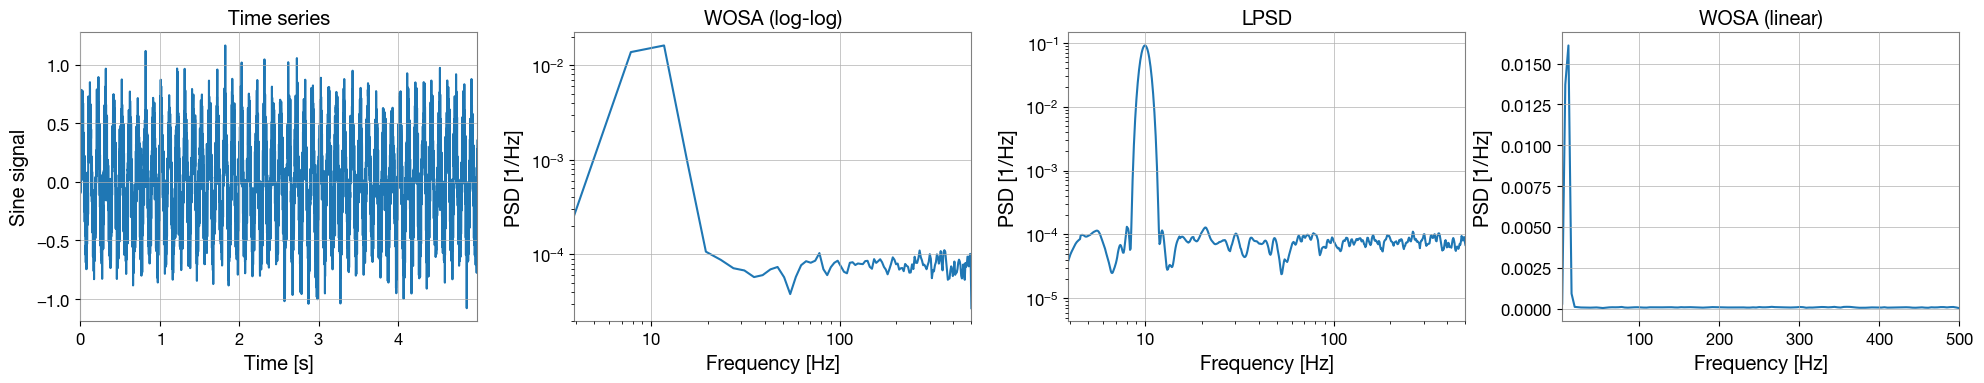

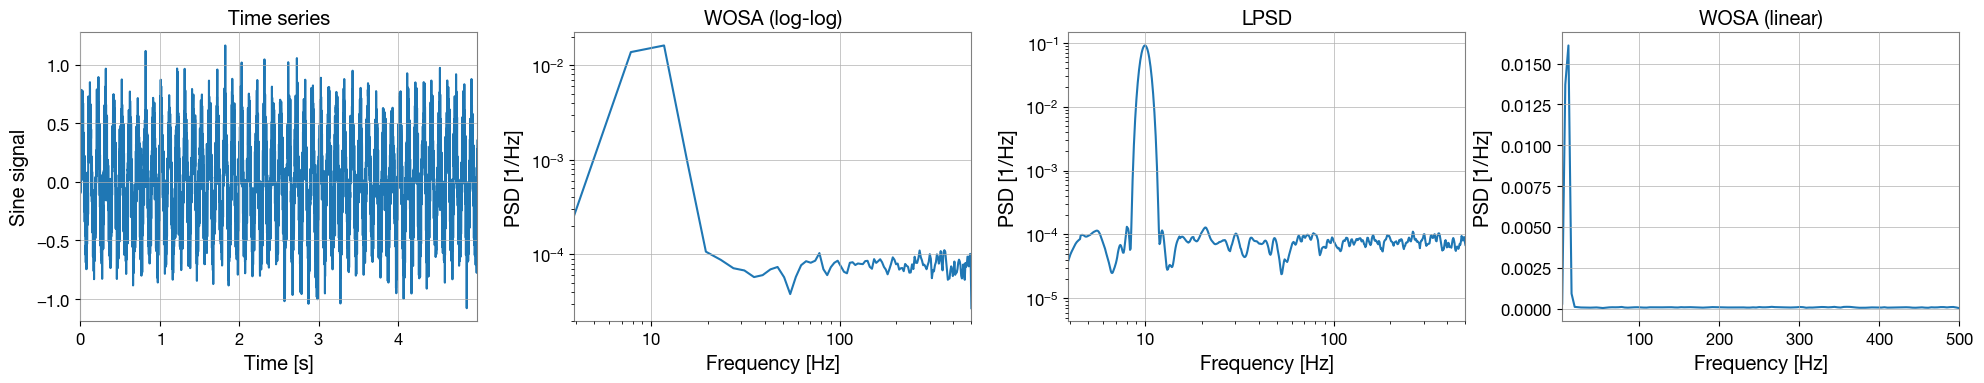

In [4]:
# Synthetic example: 10 Hz sine in white Gaussian noise
fs = 1000          # Hz
t  = np.arange(0, 5, 1/fs)
dt = t[1] - t[0]
nper = 256
sig = 0.5*np.sin(2*np.pi*10*t) + 0.2*np.random.randn(t.size)

psd_and_plot_hor(
    data = sig, 
    t = t, 
    dt = dt, 
    nper = 256, 
    title = "Sine signal", 
    window = 'hann', 
    scaling = 'density', 
    custom_wosa=False,
    average="mean",
)

psd_and_plot_hor(
    data = sig, 
    t = t, 
    dt = dt, 
    nper = 256, 
    title = "Sine signal", 
    window = 'hann', 
    scaling = 'density', 
    custom_wosa=True,
    average="mean",
)

Regular Scipy Welch
Custom WOSA yooohoo
Exiting custom wosa


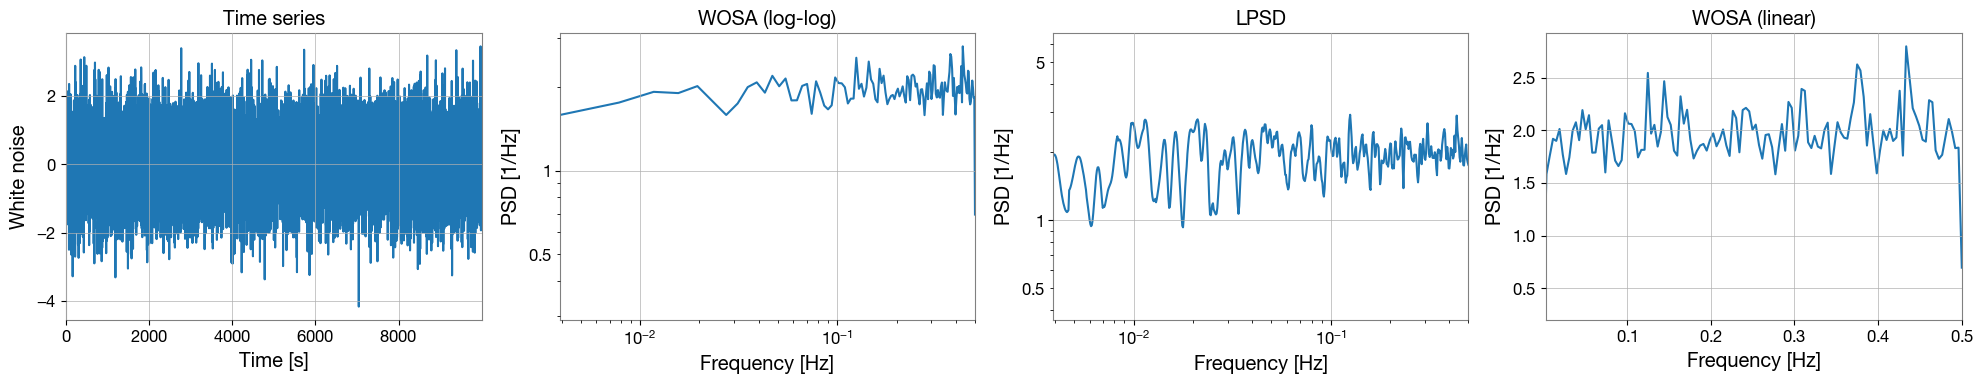

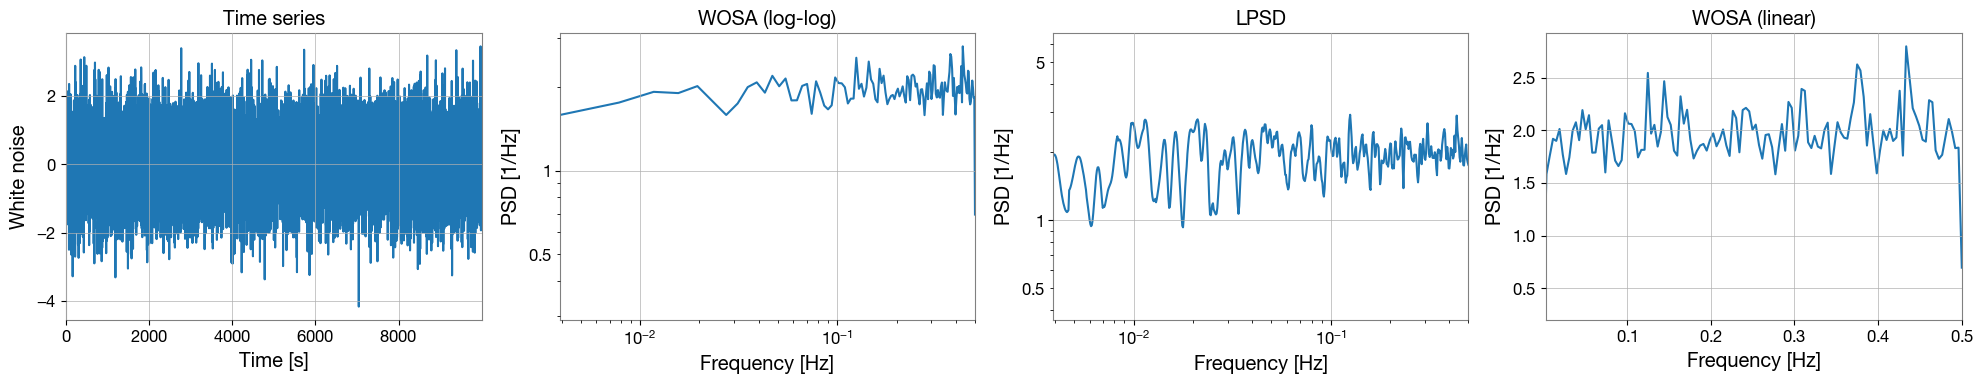

In [5]:
mean = 0
std = 1 
num_samples = 10000
whiteNoise = np.random.normal(mean, std, size=num_samples)

t   = np.arange(num_samples)
data = whiteNoise
dt  = 1
psd_and_plot_hor(data, t, dt, nper=256, title="White noise", custom_wosa=False, average="mean")
psd_and_plot_hor(data, t, dt, nper=256, title="White noise", custom_wosa=True, average="mean")

Regular Scipy Welch
Custom WOSA yooohoo
Exiting custom wosa
Regular Scipy Welch
Custom WOSA yooohoo
Exiting custom wosa


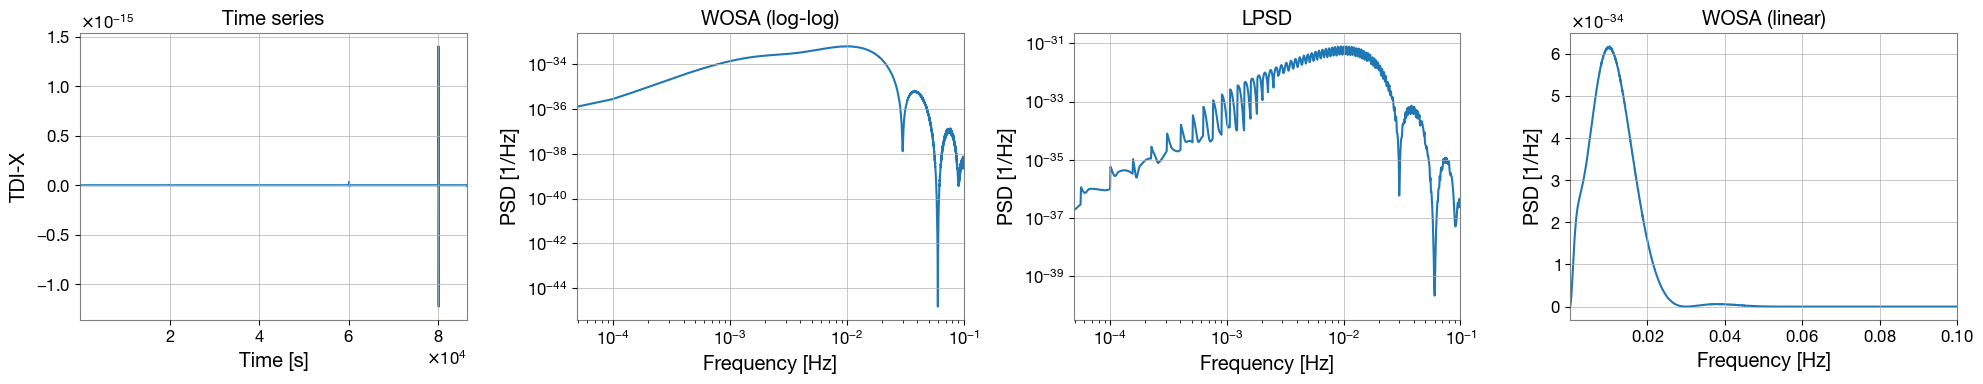

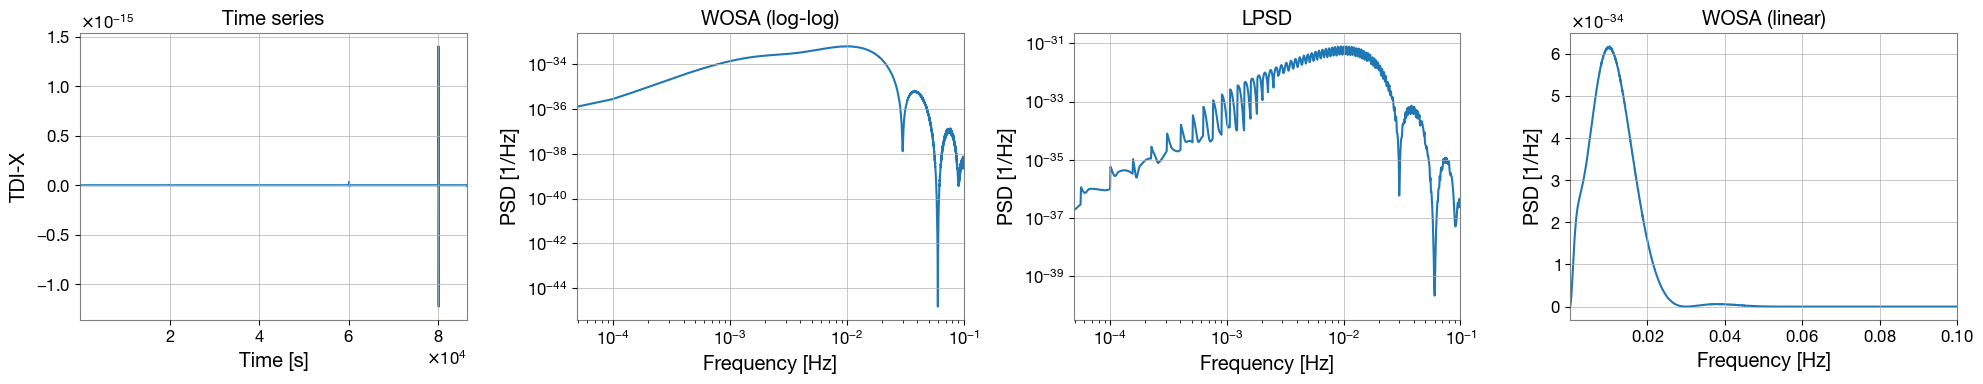

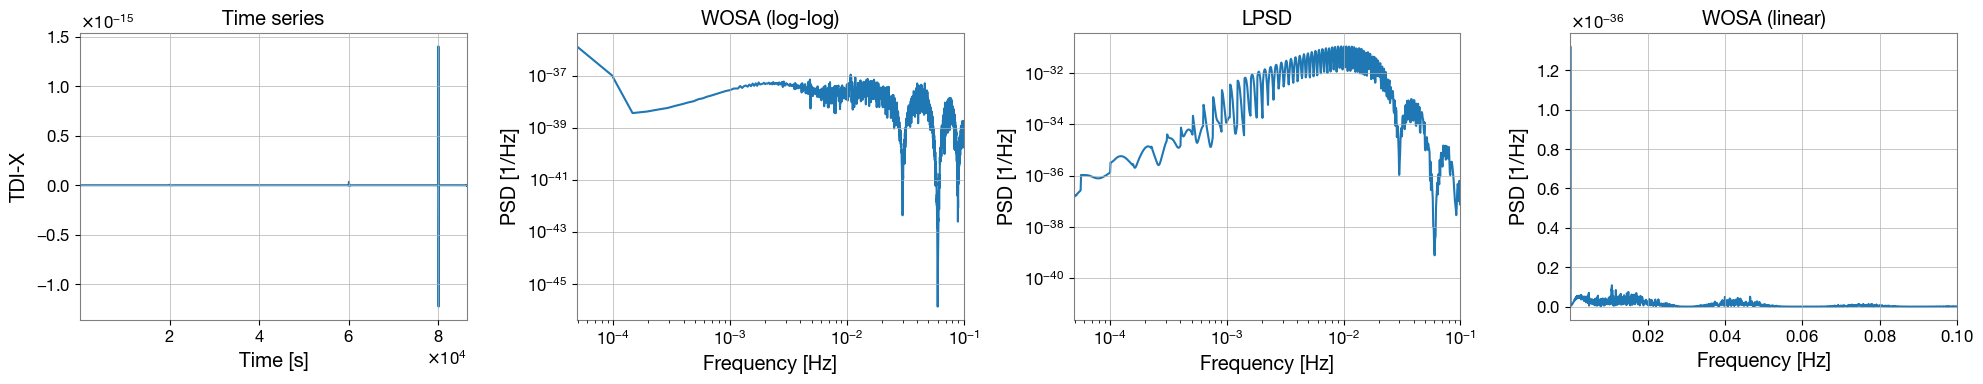

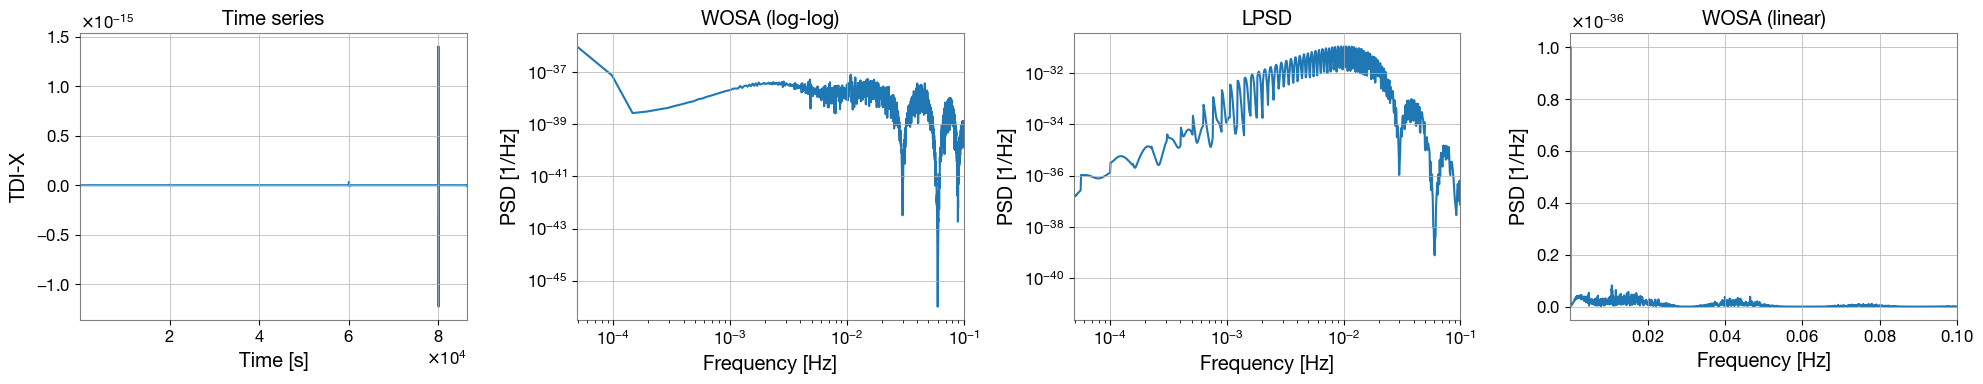

In [6]:
bethLISA_directory = os.path.join(os.getcwd(), "..", "..", "bethLISA")
glitch_simulation_directory = os.path.join(bethLISA_directory, 'lisa_glitch_simulation')
tdi_output_directory = os.path.join(glitch_simulation_directory, 'tdi_outputs')

# plot Scipy's version of Welch with mean, 
# and my version of Welch with mean 
psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "large_glitch_tdi.h5"),
    custom_wosa = False,
    average="mean",
    window="hann"
)

psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "large_glitch_tdi.h5"),
    custom_wosa = True,
    average="mean",
    window="hann"
)

# plot Scipy's version of Welch with median, 
# and  my versino of Welch with median
psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "large_glitch_tdi.h5"),
    custom_wosa = False,
    average="median",
    window='nuttall'
)

psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "large_glitch_tdi.h5"),
    custom_wosa = True,
    average="median",
    window='nuttall'
)